#### Tasks:
Implement a content-based book recommender by following the three steps:

(1) Representing items with TF-IDF vectors: compute the TF-IDF vector for each book
in the dataset using its book title. When this step is finished, the model should contain a
mapping of item IDs to TF-IDF vectors (set max_feature = 100 for Question 1).

(2) Building user profiles: use the target user’s ratings in the training data to construct
the user profile.

(3) Predicting user preference for items: predict user preference for items by
computing the Cosine similarity between the constructed user profile with each
candidate item. Then, the system can generate a recommended list for the target user.

### Question 1 
Generate a top-K recommendation list for the user with id “271448“, and evaluate the
recommendation performance using the user’s rating data in the testing data. For
evaluation, measure Precision@K, Recall@K, and nDCG@K with K={5, 10, 15, 20, 25,
30}.

(a) Construct an unweighted profile for this user to generate the top-K
recommended items and evaluate the recommendation performance.

(b) Construct a weighted profile for this user to generate the top-K recommended
items and evaluate the recommendation performance.

(c) Summarize all results from (a) and (b) in a table and briefly discuss them.

#### As mentioned in the tasks, there is no need to use a hot one in both questions. 

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from processing import preprocessing
from evaluation import evaluation

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
books_data = 'book_info.csv'
ratings_data = 'book_train_data.csv'
test_rating_data = 'book_test_data.csv'
books_df = pd.read_csv(books_data)
ratings_df = pd.read_csv(ratings_data)
test_ratings_df = pd.read_csv(test_rating_data)
#books_df ['Book_Title'] = books_df.Book_Title.str.split('|')
#books_df
#ratings_df
test_ratings_df 

,userId,itemId,rating
0,130571,0060175400,8
1,6575,0345433491,8
2,218121,0553377868,8
3,81597,067976402X,9
4,106007,0517693119,10
...,...,...,...
10997,227447,0446611212,9
10998,239584,0374525641,10
10999,14422,0316734837,8
11000,154469,0553571885,10


In [4]:
ratings_df

,userId,itemId,rating
0,277427,0425116840,8
1,277427,0425133516,9
2,277427,0440185327,5
3,277427,0440236738,9
4,277427,0446350982,9
...,...,...,...
3028,274301,0451190564,9
3029,274301,0553280341,10
3030,274301,0671028367,7
3031,274301,0740704818,10


In [5]:
# Let's check for missing values
ratings_df.isna().sum()

userId    0
itemId    0
rating    0
dtype: int64

In [6]:
books_df

,Unnamed: 0,itemId,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
1,1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
2,2,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...
3,3,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
4,4,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...
...,...,...,...,...,...,...,...,...,...
3126,3169,1558599177,Vicky's World Postcard Packet,Dolce &amp; Gabbana,1994,Abbeville Press,http://images.amazon.com/images/P/1558599177.0...,http://images.amazon.com/images/P/1558599177.0...,http://images.amazon.com/images/P/1558599177.0...
3127,3170,0064430189,The Runaway Bunny,Margaret Wise Brown,1977,HarperTrophy,http://images.amazon.com/images/P/0064430189.0...,http://images.amazon.com/images/P/0064430189.0...,http://images.amazon.com/images/P/0064430189.0...
3128,3171,067121148X,Uncle Shelby's ABZ Book: A Primer for Adults Only,Shel Silverstein,1985,Fireside,http://images.amazon.com/images/P/067121148X.0...,http://images.amazon.com/images/P/067121148X.0...,http://images.amazon.com/images/P/067121148X.0...
3129,3172,0449002551,Heartthrob,Suzanne Brockmann,1999,Ivy Books,http://images.amazon.com/images/P/0449002551.0...,http://images.amazon.com/images/P/0449002551.0...,http://images.amazon.com/images/P/0449002551.0...


In [497]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

stopword = stopwords.words('english')

def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
def preprocessing(text):
    
    # lower case
    text = text.lower()
    
    # remove punctuation
    text_rp = "".join([char for char in text if char not in string.punctuation])
    
    # word tokenization 
    tokens = word_tokenize(text_rp)
    
    # remove stopwords  
    
    tokens_without_stopwords = [word for word in tokens if word not in stopword]

    # lemm
    tagged_tokens = nltk.pos_tag(tokens_without_stopwords)
    #print(tagged_tokens)
    tokens_processed = []
    
    lemmatizer = WordNetLemmatizer()
    for word, tag in tagged_tokens:
        word_net_tag = get_wordnet_pos(tag)
        if word_net_tag != '':
            tokens_processed.append(lemmatizer.lemmatize(word, word_net_tag))
        else:
            tokens_processed.append(word)
    text_processed = ' '.join(tokens_processed)
    
    return text_processed

In [498]:
# Step 1: Representing items with TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

def item_representation_based_book_plots(books_df,max_feat=100):
    
    tfidf = TfidfVectorizer(preprocessor=preprocessing, 
                            ngram_range=(1,1),
                            max_features=max_feat)
    tfidf_matrix = tfidf.fit_transform(books_df['Book-Title'])
    
    feature_list = tfidf.get_feature_names_out()
    book_TF_IDF_vector = pd.DataFrame(tfidf_matrix.toarray(),columns=feature_list)
    book_TF_IDF_vector['itemId'] = books_df['itemId']
    print(book_TF_IDF_vector)

    return tfidf_matrix, book_TF_IDF_vector, feature_list

#the model should contain a mapping of item IDs to TF-IDF vectors
#book_TF_IDF_vector
#tfidf_matrix.shape

In [499]:
# Step 2: Building user profile
def build_user_profile(user_id, user_preference_df, item_rep_vector, feature_list, weighted=True, normalized=True):

    ## A: Edit user preference (e.g., rating data) 
    user_preference_df = user_preference_df[['itemId','rating']].copy(deep=True).reset_index(drop=True)
    
    invalid_id_list = [id for id in user_preference_df.itemId if id not in item_rep_vector.itemId.values]
    user_preference_df = user_preference_df.drop(user_preference_df[user_preference_df.itemId.isin(invalid_id_list)].index)
    
    ## B: Calculate item representation matrix to represent user profiles
    user_book_rating_df = pd.merge(user_preference_df, item_rep_vector, on="itemId")
    user_book_df = user_book_rating_df.copy(deep=True)
    user_book_df = user_book_df[feature_list]
    ## C: Aggregate item representation matrix
    rating_weight = len(user_preference_df)*[1]
    if weighted:
        rating_weight = user_preference_df.rating / user_preference_df.rating.sum()

    user_profile = user_book_df.T.dot(rating_weight)

    if normalized:
        user_profile = user_profile / sum(user_profile.values)
        
    return user_profile


In [500]:
# Step 3: Predicting user preference for items
def generate_recommendation_results(user_id, user_profile,item_rep_matrix, books_data):
    # Comput the cosine similarity
    u_v = user_profile.values
    u_v_matrix =  [u_v]
    recommendation_table =  cosine_similarity(u_v_matrix,item_rep_matrix)

    recommendation_table_df = books_df[['itemId', 'Book-Title']].copy(deep=True)
    recommendation_table_df['similarity'] = recommendation_table[0]
    rec_result = recommendation_table_df.sort_values(by=['similarity'], ascending=False)

    return rec_result

In [501]:
def get_recommendation_list(rec_result,user_preference_df, k):
    top_k_recommendation = []
    book_in_user_pre = user_preference_df.itemId.unique()
    for rec_book_id in rec_result.itemId.values:
        if rec_book_id not in book_in_user_pre:
            top_k_recommendation.append(rec_book_id)
        if len(top_k_recommendation)==k:
            break
    return top_k_recommendation

def get_ground_truth_list(test_ratings_df, user_id):
    
    #we are using a new file for the test
    user_rating_test_df = test_ratings_df[test_ratings_df['userId'] == user_id]
    user_preference_test_df = user_rating_test_df.reset_index(drop=True)
    user_testing_df = user_preference_test_df
    user_ground_truth = user_testing_df[user_testing_df.rating>5]

    true_rec_list = user_ground_truth.itemId.values
    
    return true_rec_list

### Building user profiles (weighted)

In [502]:
user_id = 271448 
# Step 1: Representing items with one-hot vectors
item_rep_matrix, item_rep_vector, feature_list = item_representation_based_book_plots(books_df,max_feat=100)
#feature_list
##the model should contain a mapping of item IDs to TF-IDF vectors
item_rep_vector

      alex  america  american  amp  angel  anita  anne  ballantine  behind  \
0      0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
1      0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
2      0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
3      0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
4      0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
...    ...      ...       ...  ...    ...    ...   ...         ...     ...   
3126   0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
3127   0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
3128   0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
3129   0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   
3130   0.0      0.0       0.0  0.0    0.0    0.0   0.0         0.0     0.0   

      big  ...  true  two  vampire   vintage  white  witch  wom

,alex,america,american,amp,angel,anita,anne,ballantine,behind,big,...,true,two,vampire,vintage,white,witch,woman,world,year,itemId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0440234743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0452264464
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0609804618
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0971880107
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0345402871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1558599177
3127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0064430189
3128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,067121148X
3129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0449002551


In [503]:
# Step 2: Building user profiles (weighted)
user_rating_df = ratings_df[ratings_df['userId'] == user_id]
user_preference_df = user_rating_df.reset_index(drop=True)
user_preference_df

,userId,itemId,rating
0,271448,0060987103,9
1,271448,0064407667,8
2,271448,0312195516,9
3,271448,0312305060,7
4,271448,0312966091,9
5,271448,0375702709,5
6,271448,038533334X,6
7,271448,0385498411,9
8,271448,0425184943,10
9,271448,0449911004,8


In [504]:
# user_profile
user_profile = build_user_profile(user_id, user_preference_df, item_rep_vector, feature_list, weighted=True, normalized=True)
user_profile

alex        0.000000
america     0.000000
american    0.000000
amp         0.000000
angel       0.000000
              ...   
white       0.000000
witch       0.050561
woman       0.078167
world       0.000000
year        0.000000
Length: 100, dtype: float64

In [505]:
# Step 3: Predicting user interest in items
rec_result = generate_recommendation_results(user_id, user_profile,item_rep_matrix, books_df)
rec_result

,itemId,Book-Title,similarity
1918,0312099436,Women of the Silk : A Novel,0.492315
2295,0066214440,Enemy Women: A Novel,0.492315
2082,0425133516,The Hunt for Red October (Jack Ryan Novels),0.486517
1108,0312966091,Three To Get Deadly : A Stephanie Plum Novel (...,0.431968
146,0312278586,The Nanny Diaries: A Novel,0.424845
...,...,...,...
1616,0684195488,Accordion Crimes,0.000000
1615,0452281881,e,0.000000
1614,0385302304,Outlander,0.000000
1613,0425157474,Chance,0.000000


In [506]:
# get ground truth data
true_rec_list = get_ground_truth_list(test_ratings_df, user_id)
true_rec_list.shape

(56,)

In [507]:
# Evaluation metrics

import numpy as np
def precision_at_k(y_true_list, y_reco_list, users, k):
    precision_all = list()
    for u in users:
        y_true = y_true_list[u]
        y_reco = y_reco_list[u]
        common_items = set(y_reco).intersection(y_true)
        precision = len(common_items) / k
        precision_all.append(precision)
    return np.mean(precision_all)


def recall_at_k(y_true_list, y_reco_list, users, k):
    recall_all = list()
    for u in users:
        y_true = y_true_list[u]
        y_reco = y_reco_list[u]
        common_items = set(y_reco).intersection(y_true)
        recall = len(common_items) / len(y_true)
        recall_all.append(recall)
    return np.mean(recall_all)


def ndcg_at_k(y_true_list, y_reco_list, users, k):
    ndcg_all = list()
    for u in users:
        rank_list = np.zeros(k)
        y_true = list(set(y_true_list[u]))
        y_reco = y_reco_list[u]
        common_items, indices_in_true, indices_in_reco = np.intersect1d(
            y_true, y_reco, assume_unique=True, return_indices=True)

        if common_items.size > 0:
            rank_list[indices_in_reco] = 1
            ideal_list = np.sort(rank_list)[::-1]
            dcg = np.sum(rank_list / np.log2(np.arange(2, k + 2)))
            idcg = np.sum(ideal_list / np.log2(np.arange(2, k + 2)))
            ndcg = dcg / idcg
        else:
            ndcg = 0
        ndcg_all.append(ndcg)
    return np.mean(ndcg_all)

In [508]:
def evaluation(y_true_list, y_reco_list, users, k):
    precision_res = precision_at_k(y_true_list, y_reco_list, users, k)
    recall_res = recall_at_k(y_true_list, y_reco_list, users, k)
    ndcg_res = ndcg_at_k(y_true_list, y_reco_list, users, k)
    print("Precision@",k, ':', precision_res)
    print("Recall@:",k, ':', recall_res )
    print("nDCG@:", k, ':', ndcg_res)
    
    return precision_res, recall_res, ndcg_res 

In [509]:
# Specify a list to store the result
result_list_q1 = []
def store_result_q1(cur_result_list, i_method, i_k, i_precison, i_recall, i_ndcg):
    new_result={
        'method': i_method,
        'k': i_k,
        'precision': i_precison,
        'recall': i_recall,
        'ndcg': i_ndcg
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [510]:
k_value_list=[5, 10, 15, 20, 25, 30]
users = [user_id]
y_true_list = {}
y_true_list[user_id] = true_rec_list
method_name = 'Content_based_book_plot_weighted'

weighted_precision_res_list = []
weighted_recall_res_list = []
weighted_ndcg_res_list = []

for k in k_value_list:
    print("===================")
    print("k=", k)
    y_rec_list = {}
    y_rec_list[user_id] = get_recommendation_list(rec_result,user_preference_df,k)
    precision, recall, ndcg = evaluation(y_true_list, y_rec_list, users, k)
    weighted_precision_res_list.append(precision)
    weighted_recall_res_list.append(recall)
    weighted_ndcg_res_list.append(ndcg)
    print(y_rec_list)
    result_list_q1 = store_result_q1(result_list_q1, method_name, 
                               k, precision, recall, ndcg)

k= 5
Precision@ 5 : 0.2
Recall@: 5 : 0.017857142857142856
nDCG@: 5 : 0.38685280723454163
{271448: ['0312099436', '0066214440', '0425133516', '0312278586', '0312291639']}
k= 10
Precision@ 10 : 0.1
Recall@: 10 : 0.017857142857142856
nDCG@: 10 : 0.38685280723454163
{271448: ['0312099436', '0066214440', '0425133516', '0312278586', '0312291639', '0671042262', '0375500510', '0807083054', '0671026682', '0312185863']}
k= 15
Precision@ 15 : 0.06666666666666667
Recall@: 15 : 0.017857142857142856
nDCG@: 15 : 0.38685280723454163
{271448: ['0312099436', '0066214440', '0425133516', '0312278586', '0312291639', '0671042262', '0375500510', '0807083054', '0671026682', '0312185863', '0312983867', '0312265867', '0312966970', '0312205406', '0312971346']}
k= 20
Precision@ 20 : 0.05
Recall@: 20 : 0.017857142857142856
nDCG@: 20 : 0.38685280723454163
{271448: ['0312099436', '0066214440', '0425133516', '0312278586', '0312291639', '0671042262', '0375500510', '0807083054', '0671026682', '0312185863', '0312983867'

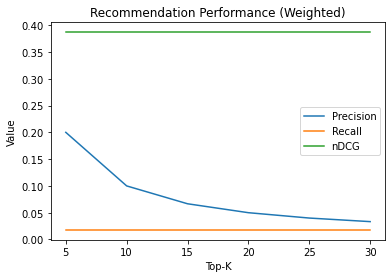

In [511]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_value_list,weighted_precision_res_list,label='Precision')
plt.plot(k_value_list,weighted_recall_res_list,label='Recall')
plt.plot(k_value_list,weighted_ndcg_res_list,label='nDCG')

plt.title('Recommendation Performance (Weighted)')
plt.xlabel('Top-K')
plt.ylabel('Value')
plt.legend()
plt.show()

### Building user profiles (unweighted)

In [512]:
# Step 2: Building user profiles (unweighted)
user_rating_df = ratings_df[ratings_df['userId'] == user_id]
user_preference_df = user_rating_df.reset_index(drop=True)
user_profile = build_user_profile(user_id, user_preference_df, item_rep_vector, feature_list, weighted=False, normalized=True)
# Step 3: Predicting user interest in items
rec_result = generate_recommendation_results(user_id, user_profile,item_rep_matrix, books_df)


In [513]:
k_value_list=[5, 10, 15, 20, 25, 30]
users = [user_id]
y_true_list = {}
y_true_list[user_id] = true_rec_list
method_name = 'Content_based_book_plot_unweighted'

unweighted_precision_res_list = []
unweighted_recall_res_list = []
unweighted_ndcg_res_list = []

for k in k_value_list:
    print("===================")
    print("k=", k)
    y_rec_list = {}
    y_rec_list[user_id] = get_recommendation_list(rec_result,user_preference_df,k)
    precision, recall, ndcg = evaluation(y_true_list, y_rec_list, users, k)
    unweighted_precision_res_list.append(precision)
    unweighted_recall_res_list.append(recall)
    unweighted_ndcg_res_list.append(ndcg)
    print(y_rec_list)
    result_list_q1 = store_result_q1(result_list_q1, method_name, 
                               k, precision, recall, ndcg)

k= 5
Precision@ 5 : 0.0
Recall@: 5 : 0.0
nDCG@: 5 : 0.0
{271448: ['0312099436', '0066214440', '0425133516', '0671026682', '0375727132']}
k= 10
Precision@ 10 : 0.0
Recall@: 10 : 0.0
nDCG@: 10 : 0.0
{271448: ['0312099436', '0066214440', '0425133516', '0671026682', '0375727132', '0345354931', '006093090X', '0312992416', '0061000175', '034545104X']}
k= 15
Precision@ 15 : 0.0
Recall@: 15 : 0.0
nDCG@: 15 : 0.0
{271448: ['0312099436', '0066214440', '0425133516', '0671026682', '0375727132', '0345354931', '006093090X', '0312992416', '0061000175', '034545104X', '0060934417', '0141301155', '0375706771', '0804109729', '067945960X']}
k= 20
Precision@ 20 : 0.0
Recall@: 20 : 0.0
nDCG@: 20 : 0.0
{271448: ['0312099436', '0066214440', '0425133516', '0671026682', '0375727132', '0345354931', '006093090X', '0312992416', '0061000175', '034545104X', '0060934417', '0141301155', '0375706771', '0804109729', '067945960X', '0060540753', '0688163173', '0440221919', '0743418204', '0312984839']}
k= 25
Precision@ 25 

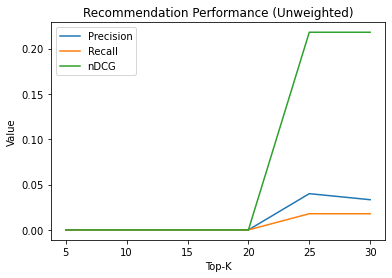

In [514]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_value_list,unweighted_precision_res_list,label='Precision')
plt.plot(k_value_list,unweighted_recall_res_list,label='Recall')
plt.plot(k_value_list,unweighted_ndcg_res_list,label='nDCG')

plt.title('Recommendation Performance (Unweighted)')
plt.xlabel('Top-K')
plt.ylabel('Value')
plt.legend()
plt.show()

### Comparison: unweighted user profiles vs. weighted user profiles

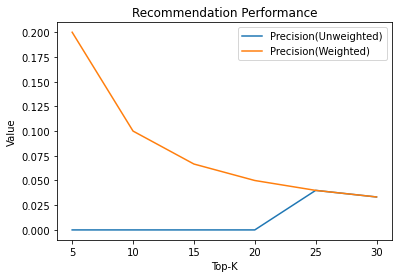

In [515]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_value_list,unweighted_precision_res_list,label='Precision(Unweighted)')
plt.plot(k_value_list,weighted_precision_res_list,label='Precision(Weighted)')

plt.title('Recommendation Performance')
plt.xlabel('Top-K')
plt.ylabel('Value')
plt.legend()
plt.show()

As shown in the diagram, in smaller Ks, the weighted one has more value, and with increasing k, the weighted and non-weighted profiles both have the same performance. 

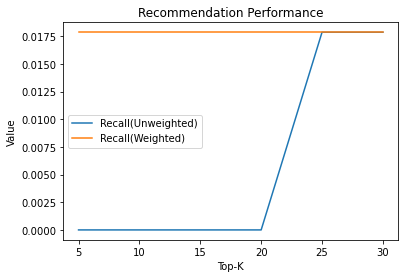

In [516]:
plt.plot(k_value_list,unweighted_recall_res_list,label='Recall(Unweighted)')
plt.plot(k_value_list,weighted_recall_res_list,label='Recall(Weighted)')

plt.title('Recommendation Performance')
plt.xlabel('Top-K')
plt.ylabel('Value')
plt.legend()
plt.show()

In general, Recall does not have different values for the weighted profile, and in the unweighted profile for smaller ks it has zero values, and after a while it converges to the same performance of the weighted profile. 

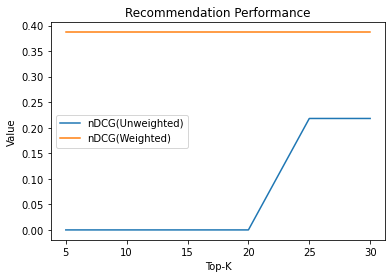

In [517]:
plt.plot(k_value_list,unweighted_ndcg_res_list,label='nDCG(Unweighted)')
plt.plot(k_value_list,weighted_ndcg_res_list,label='nDCG(Weighted)')

plt.title('Recommendation Performance')
plt.xlabel('Top-K')
plt.ylabel('Value')
plt.legend()
plt.show()

nDGC does not have different values for the weightثی profile and, like Recall, has zero values for the smaller ks in the unweighted profile and has a stable performance after an increase again. But can not reach weight performance (at least as long as k is 30). 

In [518]:
result_list_q1[1]

{'method': 'Content_based_book_plot_weighted',
 'k': 10,
 'precision': 0.1,
 'recall': 0.017857142857142856,
 'ndcg': 0.38685280723454163}

In [519]:
result_df_q1 = pd.DataFrame.from_dict(result_list_q1)
result_df_q1

,method,k,precision,recall,ndcg
0,Content_based_book_plot_weighted,5,0.200000,0.017857,0.386853
1,Content_based_book_plot_weighted,10,0.100000,0.017857,0.386853
2,Content_based_book_plot_weighted,15,0.066667,0.017857,0.386853
3,Content_based_book_plot_weighted,20,0.050000,0.017857,0.386853
4,Content_based_book_plot_weighted,25,0.040000,0.017857,0.386853
5,Content_based_book_plot_weighted,30,0.033333,0.017857,0.386853
6,Content_based_book_plot_unweighted,5,0.000000,0.000000,0.000000
7,Content_based_book_plot_unweighted,10,0.000000,0.000000,0.000000
8,Content_based_book_plot_unweighted,15,0.000000,0.000000,0.000000
9,Content_based_book_plot_unweighted,20,0.000000,0.000000,0.000000


All test datasets have a score greater than 5. As shown in the table, the precision values(the ratio of items among the top K recommendations that are actually relevant to the user) decrease as the number of recommended items for the weighted profile increases. . While the two reminders recall(the ground truth items that are included in the top-K recommendations) and ndcg (rating metric that includes the finding of normalized discounted cumulative gain) do not change with increasing k. For a unweighted, for k in the range 5 to 20, all evaluation criteria are zero. Predictable because all test data set rankings have a rating higher than 5. 

### Question 2 
Compare the following three methods on the whole dataset: content-based book RS with
weighted user profiles, content-based book RS with unweighted user profiles, and
random method.

(a) For TF-IDF vectors, try max_features = 100, 200, 300, 400.

(b) Metrics: Precision@K, Recall@K, nDCG@K (try K={5, 10, 15, 20, 25, 30}).

(c) Summarize all results using table or figure, and briefly discuss them by
comparing with those you got on the movie dataset in the Lab 2.

In [525]:
books_data = 'book_info.csv'
ratings_data = 'book_train_data.csv'
test_rating_data = 'book_test_data.csv'
books_df = pd.read_csv(books_data)
ratings_df = pd.read_csv(ratings_data)
test_ratings_df = pd.read_csv(test_rating_data)

In [526]:
# Step 1: Representing items with TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

def item_representation_based_book_plots(books_df,max_feat=100):
    
    tfidf = TfidfVectorizer(preprocessor=preprocessing, 
                            ngram_range=(1,1),
                            max_features=max_feat)
    tfidf_matrix = tfidf.fit_transform(books_df['Book-Title'])
    
    feature_list = tfidf.get_feature_names_out()
    book_TF_IDF_vector = pd.DataFrame(tfidf_matrix.toarray(),columns=feature_list)
    book_TF_IDF_vector['itemId'] = books_df['itemId']

    return tfidf_matrix, book_TF_IDF_vector, feature_list

In [527]:
import copy
def evaluate_content_RS_based_on_book_plot(ratings_df,books_df,test_ratings_df,max_feat=100, k=20, weighted_or_not=True, normalized_or_not=False):

    item_rep_matrix, item_rep_vector, feature_list = item_representation_based_book_plots(books_df, max_feat=max_feat)

    all_user_id_list = ratings_df.userId.unique()
    y_true_list = {}
    y_rec_list = {}
    for user_id in all_user_id_list:
        #print(user_id)
        user_rating_df = ratings_df[ratings_df['userId'] == user_id]
        user_preference_df = user_rating_df.reset_index(drop=True)

        # Step 2: Building user profiles
        user_profile = build_user_profile(user_id, user_preference_df, item_rep_vector, feature_list, weighted=weighted_or_not, normalized=normalized_or_not)
        # Step 3: Predicting user interest in items
        rec_result = generate_recommendation_results(user_id, user_profile,item_rep_matrix, books_df)
        # Evaluation
        # get ground truth data
        groun_truth_rec_list = get_ground_truth_list(test_ratings_df, user_id)
        y_true_list[user_id] = copy.deepcopy(groun_truth_rec_list)
        y_rec_list[user_id] = copy.deepcopy(get_recommendation_list(rec_result,user_preference_df,k))
    
    precision, recall, ndcg = evaluation(y_true_list, y_rec_list, all_user_id_list, k)
    
    return precision, recall, ndcg

#### With weighted user profiles

In [528]:
# Specify a list to store the result

result_list = []
def store_result(cur_result_list, i_method, i_k, i_precison, i_recall, i_ndcg):
    new_result={
        'method': i_method,
        'k': i_k,
        'precision': i_precison,
        'recall': i_recall,
        'ndcg': i_ndcg
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [529]:
TF_IDF_max_feature = 100
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF100_weighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=True,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)



Precision@ 5 : 0.07348484848484849
Recall@: 5 : 0.009193929250448178
nDCG@: 5 : 0.14626398530361392
Precision@ 10 : 0.07272727272727274
Recall@: 10 : 0.018209377803382235
nDCG@: 10 : 0.18940665253146527
Precision@ 15 : 0.06767676767676768
Recall@: 15 : 0.02468989544893398
nDCG@: 15 : 0.20682731688508077
Precision@ 20 : 0.060795454545454534
Recall@: 20 : 0.029155735496457665
nDCG@: 20 : 0.22055034137909232
Precision@ 25 : 0.055909090909090915
Recall@: 25 : 0.03299098288686403
nDCG@: 25 : 0.23180192944599665
Precision@ 30 : 0.05126262626262626
Recall@: 30 : 0.03650154187923924
nDCG@: 30 : 0.23805306657351571


In [530]:
TF_IDF_max_feature = 200
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF200_weighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=True,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)



Precision@ 5 : 0.08333333333333333
Recall@: 5 : 0.010046801457868751
nDCG@: 5 : 0.16615904916387023
Precision@ 10 : 0.07916666666666668
Recall@: 10 : 0.018841227062725282
nDCG@: 10 : 0.19663057211620563
Precision@ 15 : 0.07601010101010101
Recall@: 15 : 0.026904113163657175
nDCG@: 15 : 0.2199357115075732
Precision@ 20 : 0.06761363636363638
Recall@: 20 : 0.03212888433860694
nDCG@: 20 : 0.23616781227156702
Precision@ 25 : 0.06348484848484848
Recall@: 25 : 0.03747150362250485
nDCG@: 25 : 0.24679454515367671
Precision@ 30 : 0.058712121212121215
Recall@: 30 : 0.041442867069428325
nDCG@: 30 : 0.25234707835122716


In [531]:
TF_IDF_max_feature = 300
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF300_weighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=True,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)



Precision@ 5 : 0.09242424242424244
Recall@: 5 : 0.01096017060058757
nDCG@: 5 : 0.17786239695841777
Precision@ 10 : 0.08712121212121213
Recall@: 10 : 0.02091619053062076
nDCG@: 10 : 0.21783047336618222
Precision@ 15 : 0.07954545454545454
Recall@: 15 : 0.02835275687756712
nDCG@: 15 : 0.23813267401248545
Precision@ 20 : 0.07121212121212121
Recall@: 20 : 0.03364820874619077
nDCG@: 20 : 0.2514690798948277
Precision@ 25 : 0.06651515151515153
Recall@: 25 : 0.039139214232725233
nDCG@: 25 : 0.2637017845635724
Precision@ 30 : 0.060858585858585855
Recall@: 30 : 0.0425422913481649
nDCG@: 30 : 0.26870780667836436


In [532]:
TF_IDF_max_feature = 400
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF400_weighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=True,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)



Precision@ 5 : 0.09015151515151515
Recall@: 5 : 0.010731003407103614
nDCG@: 5 : 0.17711696112749656
Precision@ 10 : 0.08409090909090909
Recall@: 10 : 0.02011203266628771
nDCG@: 10 : 0.21259505499129683
Precision@ 15 : 0.08055555555555555
Recall@: 15 : 0.029004265596051713
nDCG@: 15 : 0.23728635553945654
Precision@ 20 : 0.07424242424242425
Recall@: 20 : 0.035286704588101965
nDCG@: 20 : 0.25865552490317906
Precision@ 25 : 0.07030303030303031
Recall@: 25 : 0.04150408326717703
nDCG@: 25 : 0.2712027775743556
Precision@ 30 : 0.06502525252525251
Recall@: 30 : 0.04618159694706317
nDCG@: 30 : 0.2773399007744535


#### With unweighted user profiles

In [533]:
TF_IDF_max_feature = 100
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF100_unweighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=False,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)

    

Precision@ 5 : 0.0712121212121212
Recall@: 5 : 0.009201240614673523
nDCG@: 5 : 0.13863051471989246
Precision@ 10 : 0.06856060606060607
Recall@: 10 : 0.016856250637952253
nDCG@: 10 : 0.17132021186692892
Precision@ 15 : 0.06388888888888888
Recall@: 15 : 0.022921651962845395
nDCG@: 15 : 0.19432846145648677
Precision@ 20 : 0.05776515151515151
Recall@: 20 : 0.027535812844422476
nDCG@: 20 : 0.20655393784874776
Precision@ 25 : 0.05348484848484848
Recall@: 25 : 0.03193129695811775
nDCG@: 25 : 0.2229431707021433
Precision@ 30 : 0.051010101010101006
Recall@: 30 : 0.036518093904369664
nDCG@: 30 : 0.23297499920193362


In [534]:
TF_IDF_max_feature = 200
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF200_unweighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=False,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)

 

Precision@ 5 : 0.08181818181818182
Recall@: 5 : 0.00996719092927436
nDCG@: 5 : 0.17385316472974013
Precision@ 10 : 0.08030303030303032
Recall@: 10 : 0.019554405252305635
nDCG@: 10 : 0.2101190816743367
Precision@ 15 : 0.07272727272727272
Recall@: 15 : 0.026116549736470637
nDCG@: 15 : 0.22524508936281076
Precision@ 20 : 0.06742424242424244
Recall@: 20 : 0.03220086039624392
nDCG@: 20 : 0.23635551580993158
Precision@ 25 : 0.06166666666666667
Recall@: 25 : 0.03653592875721199
nDCG@: 25 : 0.24509245581869077
Precision@ 30 : 0.05883838383838383
Recall@: 30 : 0.04156091318425588
nDCG@: 30 : 0.25652545214136185


In [535]:
TF_IDF_max_feature = 300
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF300_unweighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=False,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)

 

Precision@ 5 : 0.09242424242424242
Recall@: 5 : 0.01103605211679466
nDCG@: 5 : 0.18508266171436816
Precision@ 10 : 0.07916666666666666
Recall@: 10 : 0.019093478173424317
nDCG@: 10 : 0.21239208854368805
Precision@ 15 : 0.07398989898989898
Recall@: 15 : 0.02630977078438462
nDCG@: 15 : 0.22948709971571915
Precision@ 20 : 0.06761363636363638
Recall@: 20 : 0.031957310080643994
nDCG@: 20 : 0.24139113435805987
Precision@ 25 : 0.06363636363636364
Recall@: 25 : 0.037170110171839604
nDCG@: 25 : 0.2499613527923247
Precision@ 30 : 0.0595959595959596
Recall@: 30 : 0.04170116914738011
nDCG@: 30 : 0.26180828351810925


In [536]:
TF_IDF_max_feature = 400
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'Content_based_movie_plot_TFIDF400_unweighted'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_content_RS_based_on_book_plot(ratings_df,
                                                                      books_df,
                                                                      test_ratings_df,
                                                                      max_feat=TF_IDF_max_feature,
                                                                      k=k_v,
                                                                      weighted_or_not=False,
                                                                      normalized_or_not=False)
    
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)

 

Precision@ 5 : 0.09772727272727273
Recall@: 5 : 0.011545785696380801
nDCG@: 5 : 0.19926244952259142
Precision@ 10 : 0.08257575757575757
Recall@: 10 : 0.019900881136656435
nDCG@: 10 : 0.22166565282971218
Precision@ 15 : 0.07853535353535354
Recall@: 15 : 0.02806380050932248
nDCG@: 15 : 0.24433458944146394
Precision@ 20 : 0.0731060606060606
Recall@: 20 : 0.034174439372861416
nDCG@: 20 : 0.2557931983901929
Precision@ 25 : 0.06878787878787879
Recall@: 25 : 0.040270760832688934
nDCG@: 25 : 0.27051469364110703
Precision@ 30 : 0.06452020202020202
Recall@: 30 : 0.045203911817737384
nDCG@: 30 : 0.27909867953731227


### Evaluation on a random method (baseline)

In [537]:
from sklearn.utils import shuffle
def evaluate_baseline_random(ratings_df,books_df,test_ratings_df, k=20):

    all_user_id_list = ratings_df.userId.unique()
    y_true_list = {}
    y_rec_list = {}
    for user_id in all_user_id_list:
        user_rating_df = ratings_df[ratings_df['userId'] == user_id]
        user_preference_df = user_rating_df.reset_index(drop=True)
        
        # obtain recommendation list 
        rec_result = shuffle(books_df) # random shuffle
        
        # Evaluation
        # get ground truth data (all rating - user preference data)
        groun_truth_rec_list = get_ground_truth_list(test_ratings_df, user_id)
        y_true_list[user_id] = copy.deepcopy(groun_truth_rec_list)
        y_rec_list[user_id] = copy.deepcopy(get_recommendation_list(rec_result,user_preference_df,k))
    
     
    precision, recall, ndcg = evaluation(y_true_list, y_rec_list, all_user_id_list, k)
    
    return precision, recall, ndcg

In [538]:
evaluate_baseline_random(ratings_df,books_df,test_ratings_df, k=20)

Precision@ 20 : 0.014583333333333334
Recall@: 20 : 0.006599148636532966
nDCG@: 20 : 0.096123875576269


(0.014583333333333334, 0.006599148636532966, 0.096123875576269)

In [539]:
k_value_list = [5, 10, 15, 20, 25, 30]
method_name = 'random_baseline'

for k_v in k_value_list:
    precision, recall, ndcg = evaluate_baseline_random(ratings_df,books_df,test_ratings_df, k=k_v)
    result_list = store_result(result_list, method_name, 
                               k_v, precision, recall, ndcg)


Precision@ 5 : 0.019696969696969702
Recall@: 5 : 0.0022006020047838524
nDCG@: 5 : 0.05014916670836216
Precision@ 10 : 0.016666666666666666
Recall@: 10 : 0.004212672901402039
nDCG@: 10 : 0.06941113024688607
Precision@ 15 : 0.012373737373737374
Recall@: 15 : 0.0041389782619737775
nDCG@: 15 : 0.0806511604043314
Precision@ 20 : 0.01571969696969697
Recall@: 20 : 0.008001364622637758
nDCG@: 20 : 0.10364938405201213
Precision@ 25 : 0.013030303030303031
Recall@: 25 : 0.007714857668753316
nDCG@: 25 : 0.09851286906692217
Precision@ 30 : 0.014267676767676768
Recall@: 30 : 0.009933027513791454
nDCG@: 30 : 0.11023580048294705


In [540]:
result_list[0]

{'method': 'Content_based_movie_plot_TFIDF100_weighted',
 'k': 5,
 'precision': 0.07348484848484849,
 'recall': 0.009193929250448178,
 'ndcg': 0.14626398530361392}

In [541]:
result_df = pd.DataFrame.from_dict(result_list)
result_df

,method,k,precision,recall,ndcg
0,Content_based_movie_plot_TFIDF100_weighted,5,0.073485,0.009194,0.146264
1,Content_based_movie_plot_TFIDF100_weighted,10,0.072727,0.018209,0.189407
2,Content_based_movie_plot_TFIDF100_weighted,15,0.067677,0.024690,0.206827
3,Content_based_movie_plot_TFIDF100_weighted,20,0.060795,0.029156,0.220550
4,Content_based_movie_plot_TFIDF100_weighted,25,0.055909,0.032991,0.231802
5,Content_based_movie_plot_TFIDF100_weighted,30,0.051263,0.036502,0.238053
6,Content_based_movie_plot_TFIDF200_weighted,5,0.083333,0.010047,0.166159
7,Content_based_movie_plot_TFIDF200_weighted,10,0.079167,0.018841,0.196631
8,Content_based_movie_plot_TFIDF200_weighted,15,0.076010,0.026904,0.219936
9,Content_based_movie_plot_TFIDF200_weighted,20,0.067614,0.032129,0.236168


In [542]:
result_df[result_df['k']==5].sort_values('precision',ascending=False)

,method,k,precision,recall,ndcg
42,Content_based_movie_plot_TFIDF400_unweighted,5,0.097727,0.011546,0.199262
12,Content_based_movie_plot_TFIDF300_weighted,5,0.092424,0.010960,0.177862
36,Content_based_movie_plot_TFIDF300_unweighted,5,0.092424,0.011036,0.185083
18,Content_based_movie_plot_TFIDF400_weighted,5,0.090152,0.010731,0.177117
6,Content_based_movie_plot_TFIDF200_weighted,5,0.083333,0.010047,0.166159
30,Content_based_movie_plot_TFIDF200_unweighted,5,0.081818,0.009967,0.173853
0,Content_based_movie_plot_TFIDF100_weighted,5,0.073485,0.009194,0.146264
24,Content_based_movie_plot_TFIDF100_unweighted,5,0.071212,0.009201,0.138631
48,random_baseline,5,0.019697,0.002201,0.050149


In [543]:
result_df[result_df['k']==10].sort_values('precision',ascending=False)

,method,k,precision,recall,ndcg
13,Content_based_movie_plot_TFIDF300_weighted,10,0.087121,0.020916,0.217830
19,Content_based_movie_plot_TFIDF400_weighted,10,0.084091,0.020112,0.212595
43,Content_based_movie_plot_TFIDF400_unweighted,10,0.082576,0.019901,0.221666
31,Content_based_movie_plot_TFIDF200_unweighted,10,0.080303,0.019554,0.210119
7,Content_based_movie_plot_TFIDF200_weighted,10,0.079167,0.018841,0.196631
37,Content_based_movie_plot_TFIDF300_unweighted,10,0.079167,0.019093,0.212392
1,Content_based_movie_plot_TFIDF100_weighted,10,0.072727,0.018209,0.189407
25,Content_based_movie_plot_TFIDF100_unweighted,10,0.068561,0.016856,0.171320
49,random_baseline,10,0.016667,0.004213,0.069411


In [544]:
result_df[result_df['k']==5].sort_values('recall',ascending=False)

,method,k,precision,recall,ndcg
42,Content_based_movie_plot_TFIDF400_unweighted,5,0.097727,0.011546,0.199262
36,Content_based_movie_plot_TFIDF300_unweighted,5,0.092424,0.011036,0.185083
12,Content_based_movie_plot_TFIDF300_weighted,5,0.092424,0.010960,0.177862
18,Content_based_movie_plot_TFIDF400_weighted,5,0.090152,0.010731,0.177117
6,Content_based_movie_plot_TFIDF200_weighted,5,0.083333,0.010047,0.166159
30,Content_based_movie_plot_TFIDF200_unweighted,5,0.081818,0.009967,0.173853
24,Content_based_movie_plot_TFIDF100_unweighted,5,0.071212,0.009201,0.138631
0,Content_based_movie_plot_TFIDF100_weighted,5,0.073485,0.009194,0.146264
48,random_baseline,5,0.019697,0.002201,0.050149


In [545]:
result_df[result_df['k']==10].sort_values('recall',ascending=False)

,method,k,precision,recall,ndcg
13,Content_based_movie_plot_TFIDF300_weighted,10,0.087121,0.020916,0.217830
19,Content_based_movie_plot_TFIDF400_weighted,10,0.084091,0.020112,0.212595
43,Content_based_movie_plot_TFIDF400_unweighted,10,0.082576,0.019901,0.221666
31,Content_based_movie_plot_TFIDF200_unweighted,10,0.080303,0.019554,0.210119
37,Content_based_movie_plot_TFIDF300_unweighted,10,0.079167,0.019093,0.212392
7,Content_based_movie_plot_TFIDF200_weighted,10,0.079167,0.018841,0.196631
1,Content_based_movie_plot_TFIDF100_weighted,10,0.072727,0.018209,0.189407
25,Content_based_movie_plot_TFIDF100_unweighted,10,0.068561,0.016856,0.171320
49,random_baseline,10,0.016667,0.004213,0.069411


In [546]:
result_df[result_df['k']==5].sort_values('ndcg',ascending=False)

,method,k,precision,recall,ndcg
42,Content_based_movie_plot_TFIDF400_unweighted,5,0.097727,0.011546,0.199262
36,Content_based_movie_plot_TFIDF300_unweighted,5,0.092424,0.011036,0.185083
12,Content_based_movie_plot_TFIDF300_weighted,5,0.092424,0.010960,0.177862
18,Content_based_movie_plot_TFIDF400_weighted,5,0.090152,0.010731,0.177117
30,Content_based_movie_plot_TFIDF200_unweighted,5,0.081818,0.009967,0.173853
6,Content_based_movie_plot_TFIDF200_weighted,5,0.083333,0.010047,0.166159
0,Content_based_movie_plot_TFIDF100_weighted,5,0.073485,0.009194,0.146264
24,Content_based_movie_plot_TFIDF100_unweighted,5,0.071212,0.009201,0.138631
48,random_baseline,5,0.019697,0.002201,0.050149


In [547]:
result_df[result_df['k']==10].sort_values('ndcg',ascending=False)

,method,k,precision,recall,ndcg
43,Content_based_movie_plot_TFIDF400_unweighted,10,0.082576,0.019901,0.221666
13,Content_based_movie_plot_TFIDF300_weighted,10,0.087121,0.020916,0.217830
19,Content_based_movie_plot_TFIDF400_weighted,10,0.084091,0.020112,0.212595
37,Content_based_movie_plot_TFIDF300_unweighted,10,0.079167,0.019093,0.212392
31,Content_based_movie_plot_TFIDF200_unweighted,10,0.080303,0.019554,0.210119
7,Content_based_movie_plot_TFIDF200_weighted,10,0.079167,0.018841,0.196631
1,Content_based_movie_plot_TFIDF100_weighted,10,0.072727,0.018209,0.189407
25,Content_based_movie_plot_TFIDF100_unweighted,10,0.068561,0.016856,0.171320
49,random_baseline,10,0.016667,0.004213,0.069411


##### comparing with those we got on the movie dataset:

(1)  From both data sets, it can be said that the random baseline has minimum values in each value of k compared to other evaluation criteria. 

(2) Also we can see that in both dataset, higher max features have more evaluation values.

(3) In both datasets, precision values decrease with increasing number of k. (in both weighetd and unweighted profiles)

(4) In both datasets, recall values increase with increasing number of k. (in both weighetd and unweighted profiles)

(5) In both datasets, ndcg values increase with increasing number of k. (in both weighetd and unweighted profiles)